DS Term Project - Spotify Music Popularity Prediction

Link to data: Kaggle database
Source: Spotify for Developers API

Last updated: 2021/12/3

A) Data Pre-processing & Feature Engineering

In [ ]:
# Data imports
import io
from google.colab import files
uploaded = files.upload()

Saving final_dataset_df.csv to final_dataset_df.csv


In [ ]:
# For quick re-runs
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['final_dataset_df.csv']), header=0)

In [ ]:
import pandas as pd

music_db = pd.read_csv(io.BytesIO(uploaded['SpotifyFeatures.csv']), header=0)

In [ ]:
music_db.shape

(228159, 18)

In [ ]:
# song count by genre
count_genre = music_db.groupby(by="genre").count()

In [ ]:
# popularity by genre
popularity_genre = music_db.groupby(by="genre")["popularity"].mean()
popularity_genre

In [ ]:
popularity_genre.sort_values().plot(kind='barh', y='Popularity',title='Popularity score by genre (out of 100)');

In [ ]:
# popularity by key
popularity_key = music_db.groupby(by="key")["popularity"].mean()
popularity_key

In [ ]:
# popularity by mode
popularity_mode = music_db.groupby(by="mode")["popularity"].mean()
popularity_mode

In [ ]:
# calculate correlations using the built-in .corr() method
c1 = music_db['popularity'].corr(music_db['danceability'])
c2 = music_db['popularity'].corr(music_db['energy'])
c3 = music_db['popularity'].corr(music_db['loudness'])
c4 = music_db['popularity'].corr(music_db['speechiness'])
c5 = music_db['popularity'].corr(music_db['acousticness'])
c6 = music_db['popularity'].corr(music_db['instrumentalness'])
c7 = music_db['popularity'].corr(music_db['liveness'])
c8 = music_db['popularity'].corr(music_db['valence'])
c9 = music_db['popularity'].corr(music_db['tempo'])


In [ ]:
corr_value = pd.Series([c1, c2, c3, c4, c5, c6, c7, c8, c9], name = "Correlation")
corr_label = pd.Series(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo'], name="Song attribute")
corr_df = pd.merge(corr_label, corr_value, right_index = True,left_index = True)
corr_df.sort_values(by=["Correlation"], inplace=True)

In [ ]:
# Visualize with matplotlib chart

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

y_pos = np.arange(len(corr_df['Song attribute']))

ax.barh(y_pos, corr_df['Correlation'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(corr_df['Song attribute'])

ax.set_xlabel('Correlation with Song Popularity')
ax.set_title('Correlation of acoustic features with Popularity score on Spotify')

plt.show()

(Re-Run from here) Feature Engineering - add Genre & Artist Popularity Stats as Additional Features

In [ ]:
# Feature Engineering - add new attributes
# Calculate the # of songs from the same artist and max, mean, median, min, popularity of songs by the artist

# music_db['artist_name'].value_counts()

In [ ]:
# music_db['artist_max_popularity'] = music_db.groupby('artist_name').popularity.transform('max')
# music_db['artist_min_popularity'] = music_db.groupby('artist_name').popularity.transform('min')
# music_db['artist_mean_popularity'] = music_db.groupby('artist_name').popularity.transform('mean')
# music_db['artist_median_popularity'] = music_db.groupby('artist_name').popularity.transform('median')

In [ ]:
# calculate artist-level stats but exclusing current row/track
# artists = music_db.groupby('artist_name')
# n = artists['popularity'].transform('count')
# mean = artists['popularity'].transform('mean')

# music_db['artist_mean_pop_new'] = (mean*n - music_db['popularity'])/(n-1)

In [ ]:
music_db['artist_track_count'] = music_db.groupby('artist_name').artist_name.transform('count')

Investigate artist track count correlation issue

In [ ]:
# investigate artist track count
music_db['popularity'].corr(music_db['artist_track_count'])

-0.24691300682528144

In [ ]:
db_popular_genres = music_db[(music_db['genre'] != "Opera") & (music_db['genre'] != "Movie") & (music_db['genre'] != "A Capella") & (music_db['genre'] != "Classical") & (music_db['genre'] != "Comedy") & (music_db['genre'] != "Soundtrack") & (music_db['genre'] != "Ska")]

In [ ]:
db_popular_genres['popularity'].corr(db_popular_genres['artist_track_count'])

0.1730571338047215

In [ ]:
pop_db = music_db[(music_db['genre'] == "Pop")]
pop_db['popularity'].corr(pop_db['artist_track_count'])

0.002004452247882687

In [ ]:
rap_db = music_db[(music_db['genre'] == "Rap")]
rap_db['popularity'].corr(rap_db['artist_track_count'])

0.1315732849509519

In [ ]:
rock_db = music_db[(music_db['genre'] == "Rock")]
rock_db['popularity'].corr(rock_db['artist_track_count'])

0.020639849389483343

In [ ]:
hip_hop_db = music_db[(music_db['genre'] == "Hip-Hop")]
hip_hop_db['popularity'].corr(hip_hop_db['artist_track_count'])

0.20771697646045129

In [ ]:
indie_db = music_db[(music_db['genre'] == "Indie")]
indie_db['popularity'].corr(indie_db['artist_track_count'])

0.06872310845940795

In [ ]:
country_db = music_db[(music_db['genre'] == "Country")]
country_db['popularity'].corr(country_db['artist_track_count'])

0.1034033712376704

In [ ]:
# Note: add features on popularity stats grouped by genre
# Perform grouping, excluding the current row
results_genre = []

grouped_genre = music_db.groupby('genre')

for key, group in grouped_genre:
    for idx, row in group.iterrows():
        # The group excluding current row
        group_other = group.drop(idx)  
        median = group_other['popularity'].median()
        max = group_other['popularity'].max()
        min = group_other['popularity'].min()
        mean = group_other['popularity'].mean()
        results_genre.append(row.tolist() + [median] + [max] + [min] + [mean])

In [ ]:
results_df_genre = pd.DataFrame(results_genre, columns=['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence','artist_track_count', 
       'genre_median_popularity','genre_max_popularity', 'genre_min_popularity','genre_mean_popularity'])
results_df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_track_count,genre_median_popularity,genre_max_popularity,genre_min_popularity,genre_mean_popularity
0,A Capella,MC6 A Cappella,For the Longest Time,0PuWvFJqZPJAxZNrFgw8xL,44,0.780,0.616,223813,0.298,0.000000,D,0.0973,-7.712,Major,0.0274,82.471,4/4,0.712,15,8.0,33,0,9.008475
1,A Capella,The Singers Unlimited,Clair,1iXJKuzDH0E6PnTk2lQXAq,33,0.973,0.484,154200,0.222,0.000306,F,0.1040,-14.631,Minor,0.0440,127.689,4/4,0.409,36,8.0,44,0,9.101695
2,A Capella,MC6 A Cappella,Come Go With Me,3XxwdU13609bTGaAFRg3PA,25,0.802,0.717,137800,0.518,0.000000,G#,0.0940,-7.754,Major,0.0883,129.878,4/4,0.672,15,8.0,44,0,9.169492
3,A Capella,MC6 A Cappella,The Lion Sleeps Tonight,0crWDkAajRTnsGuZ6CAU85,26,0.302,0.691,183920,0.490,0.000007,F,0.2290,-11.222,Major,0.0743,107.066,4/4,0.664,15,8.0,44,0,9.161017
4,A Capella,Glad,A Debtor to Mercy Alone,6TK4I15u1oym5H2eETng4F,24,0.599,0.389,181267,0.153,0.000000,E,0.0902,-12.023,Major,0.0430,120.626,4/4,0.236,21,8.0,44,0,9.177966


In [ ]:
# Perform grouping, excluding the current row
results = []
# music_db_new = music_db.iloc[100:500,]
grouped = results_df_genre.groupby('artist_name')

for key, group in grouped:
    for idx, row in group.iterrows():
        # The group excluding current row
        group_other = group.drop(idx)  
        median = group_other['popularity'].median()
        max = group_other['popularity'].max()
        min = group_other['popularity'].min()
        mean = group_other['popularity'].mean()
        results.append(row.tolist() + [median] + [max] + [min] + [mean])

In [ ]:
results_df = pd.DataFrame(results, columns=['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'artist_track_count', 
       'genre_median_popularity','genre_max_popularity', 'genre_min_popularity','genre_mean_popularity',
       'artist_median_popularity', 'artist_max_popularity', 'artist_min_popularity','artist_mean_popularity'])
results_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_track_count,genre_median_popularity,genre_max_popularity,genre_min_popularity,genre_mean_popularity,artist_median_popularity,artist_max_popularity,artist_min_popularity,artist_mean_popularity
0,Alternative,!!!,Even When The Water's Cold,2UjEyfnKzaY7qpBEeESJjv,61,0.108,0.709,227067,0.831,0.00128,D,0.159,-6.847,Minor,0.0391,104.971,4/4,0.866,42,54.0,86,0,54.658362,40.0,61.0,33.0,43.414634
1,Anime,!!!,Even When The Water's Cold,2UjEyfnKzaY7qpBEeESJjv,61,0.108,0.709,227067,0.831,0.00128,D,0.159,-6.847,Minor,0.0391,104.971,4/4,0.866,42,54.0,86,0,54.658362,40.0,61.0,33.0,43.414634
2,Blues,!!!,Even When The Water's Cold,2UjEyfnKzaY7qpBEeESJjv,61,0.108,0.709,227067,0.831,0.00128,D,0.159,-6.847,Minor,0.0391,104.971,4/4,0.866,42,54.0,86,0,54.658362,40.0,61.0,33.0,43.414634
3,Children’s Music,!!!,Even When The Water's Cold,2UjEyfnKzaY7qpBEeESJjv,61,0.108,0.709,227067,0.831,0.00128,D,0.159,-6.847,Minor,0.0391,104.971,4/4,0.866,42,54.0,86,0,54.658362,40.0,61.0,33.0,43.414634
4,Dance,!!!,Even When The Water's Cold,2UjEyfnKzaY7qpBEeESJjv,61,0.108,0.709,227067,0.831,0.00128,D,0.159,-6.847,Minor,0.0391,104.971,4/4,0.866,42,57.0,100,0,57.274828,40.0,61.0,33.0,43.414634


In [ ]:
results_df.shape

(228159, 27)

In [ ]:
# handling categorical variables (i.e., genre, key, mode)

# dummy = pd.get_dummies(results_df['genre'])
# df = pd.concat([results_df, dummy], axis=1)

dummy = pd.get_dummies(music_db['key'])
df = pd.concat([music_db, dummy], axis=1)

dummy = pd.get_dummies(music_db['mode'])
df = pd.concat([df, dummy], axis=1)

# Drop all NaN value records
df = df.dropna()

In [ ]:
c1 = df['popularity'].corr(df['artist_track_count'])
c2 = df['popularity'].corr(df['artist_max_popularity'])
c3 = df['popularity'].corr(df['artist_min_popularity'])
c4 = df['popularity'].corr(df['artist_mean_popularity'])
c5 = df['popularity'].corr(df['artist_median_popularity'])

c6 = df['popularity'].corr(df['genre_max_popularity'])
c7 = df['popularity'].corr(df['genre_min_popularity'])
c8 = df['popularity'].corr(df['genre_mean_popularity'])
c9 = df['popularity'].corr(df['genre_median_popularity'])

# print(c1,c2,c3,c4,c5,c6)

In [ ]:
corr_value = pd.Series([c1, c2, c3, c5, c6, c7, c8, c9], name = "Correlation")
corr_label = pd.Series(['artist_track_count', 'artist_max_popularity', 'artist_min_popularity', 'artist_mean_popularity', 'artist_median_popularity', 'genre_max_popularity', 'genre_min_popularity', 'genre_mean_popularity', 'genre_median_popularity'], name="Song attribute")
corr_df = pd.merge(corr_label, corr_value, right_index = True,left_index = True)
corr_df.sort_values(by=["Correlation"], inplace=True)

In [ ]:
# Visualize with matplotlib chart

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

y_pos = np.arange(len(corr_df['Song attribute']))

ax.barh(y_pos, corr_df['Correlation'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(corr_df['Song attribute'])

ax.set_xlabel('Correlation with Song Popularity')
ax.set_title('Correlation of artist features with Popularity score on Spotify')

plt.show()

B) Modeling - RandomForestRegressor

In [ ]:
df.drop(columns=['artist_name','genre','track_id','time_signature','track_name'], inplace = True);
df.shape

(228159, 28)

In [ ]:
df.drop(columns=['key','mode'], inplace = True);


NOTE: run imported final df csv from here

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
x = df.drop(columns=['popularity'])
y = df["popularity"]

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                 test_size = 0.2)

In [ ]:
# default params
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

In [ ]:
# customize params
rf = RandomForestRegressor(n_estimators= 50)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
# run x-val
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(rf, x, y, cv=5)
scores_rf

array([0.98027574, 0.99202672, 0.95200951, 0.98732828, 0.98763492])

In [ ]:
scores_rf.mean()

0.9798550335441663

In [ ]:
scores_rf.std()

0.014422733633858716

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

y_pred_rf = rf.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor - Testing performance")
print("RMSE: {:.6f}".format(rmse))
print("R2: {:.6f}".format(r2))

Random Forest Regressor - Testing performance
RMSE: 0.813137
R2: 0.997789


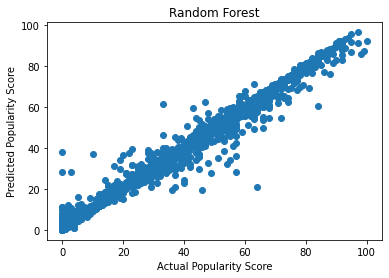

In [ ]:
# How does the scatter plot compare with the prior results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf)
plt.title('Random Forest')
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.show()

In [ ]:
# Light GBM
# Source code reference: https://www.kaggle.com/lasmith/house-price-regression-with-lightgbm
import lightgbm as lgb

X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(x, y, test_size=0.2)


In [ ]:
# Use default params
gbm = lgb.LGBMRegressor()
gbm.fit(X_train_lgb, y_train_lgb)

LGBMRegressor()

In [ ]:
# Use custom params:
# https://neptune.ai/blog/lightgbm-parameters-guide

hyper_params = {
#    'task': 'train',
    'objective': 'regression',
    'metric': ['rmse'],
    'max_depth': 16,
    'max_bin' : 512,
    "num_iterations": 15000
}
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train_lgb, y_train_lgb);

#gbm.fit(X_train_lgb, y_train_lgb,
#        eval_set=[(X_test_lgb, y_test_lgb)],
#        eval_metric='rmse',
#        early_stopping_rounds=1000);

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [ ]:
y_pred_lgb = gbm.predict(X_test_lgb, num_iteration=gbm.best_iteration_)
# y_pred_lgb = gbm.predict(X_test_lgb)
mse_rf = mean_squared_error(y_test_lgb, y_pred_lgb)
rmse = np.sqrt(mse_rf)
r2 = r2_score(y_test_lgb, y_pred_lgb)

print("LightGBM - Testing performance")
print("RMSE: {:.4f}".format(rmse))
print("R2: {:.4f}".format(r2))

LightGBM - Testing performance
RMSE: 1.1089
R2: 0.9959


In [ ]:
from sklearn.model_selection import cross_val_score
scores_lgb = cross_val_score(gbm, x, y, cv=5)
scores_lgb

NameError: ignored

In [ ]:
scores_lgb.mean()

0.9933235712497146

In [ ]:
scores_lgb.std()

0.0010492008444966307

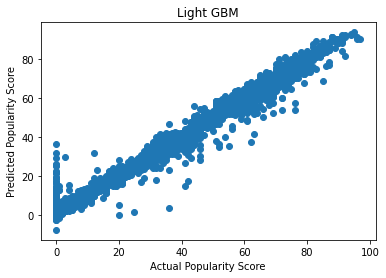

In [ ]:
plt.scatter(y_test_lgb, y_pred_lgb)
plt.title('Light GBM')
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.show()

Model 3) CatBoost

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
import catboost as cb
# model = cb.CatBoostRegressor()
cb_model = cb.CatBoostRegressor(max_depth = 16) # training time: 1 hour
# cb_model = cb.CatBoostRegressor(max_depth = 16, learning_rate=0.3) # training time: 1'20 hour

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# train_dataset = cb.Pool(X_train, y_train) 
# test_dataset = cb.Pool(X_test, y_test)

In [ ]:
cb_model.fit(X_train, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 13.4838106	total: 5.04s	remaining: 1h 23m 52s
1:	learn: 10.9234846	total: 9.98s	remaining: 1h 23m
2:	learn: 9.3522436	total: 14.9s	remaining: 1h 22m 48s
3:	learn: 8.3677786	total: 19.8s	remaining: 1h 22m 22s
4:	learn: 7.6879207	total: 20.3s	remaining: 1h 7m 22s
5:	learn: 7.3565426	total: 20.4s	remaining: 56m 17s
6:	learn: 6.8879084	total: 25.3s	remaining: 59m 47s
7:	learn: 6.6979073	total: 25.4s	remaining: 52m 27s
8:	learn: 6.4430794	total: 27.8s	remaining: 51m 2s
9:	learn: 6.2776830	total: 27.9s	remaining: 46m 3s
10:	learn: 6.1039131	total: 28.1s	remaining: 42m 2s
11:	learn: 5.9234501	total: 33.1s	remaining: 45m 22s
12:	learn: 5.6355451	total: 37.9s	remaining: 47m 58s
13:	learn: 5.5103014	total: 42.8s	remaining: 50m 17s
14:	learn: 5.4827795	total: 42.9s	remaining: 46m 55s
15:	learn: 5.4275251	total: 43.2s	remaining: 44m 14s
16:	learn: 5.3935170	total: 43.2s	remaining: 41m 38s
17:	learn: 5.0464778	total: 48.1s	remaining: 43m 45s
18:	learn: 4.9990803	total: 48.2s	remaining: 41

In [ ]:
import numpy as np

pred_cb = cb_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred_cb)))
r2 = r2_score(y_test, pred_cb)

print("Catboost - Testing performance")
print("RMSE: {:.6f}".format(rmse))
print("R2: {:.6f}".format(r2))

Catboost - Testing performance
RMSE: 1.882371
R2: 0.988260


In [ ]:
from sklearn.model_selection import cross_val_score
scores_cb = cross_val_score(cb_model, x, y, cv=5)

Streaming output truncated to the last 5000 lines.
4:	learn: 12.3999426	total: 20.7s	remaining: 1h 8m 31s
5:	learn: 11.7109621	total: 25.5s	remaining: 1h 10m 17s
6:	learn: 11.0718649	total: 30.3s	remaining: 1h 11m 33s
7:	learn: 10.5299551	total: 35.1s	remaining: 1h 12m 30s
8:	learn: 10.0401042	total: 39.9s	remaining: 1h 13m 17s
9:	learn: 9.5943607	total: 44.8s	remaining: 1h 13m 51s
10:	learn: 9.2639727	total: 44.8s	remaining: 1h 7m 11s
11:	learn: 8.9313939	total: 49.6s	remaining: 1h 8m 6s
12:	learn: 8.6238234	total: 49.8s	remaining: 1h 3m 1s
13:	learn: 8.4086878	total: 49.9s	remaining: 58m 33s
14:	learn: 8.1750226	total: 54.7s	remaining: 59m 51s
15:	learn: 7.9271704	total: 59.5s	remaining: 1h 1m
16:	learn: 7.7027478	total: 1m 4s	remaining: 1h 1m 59s
17:	learn: 7.4884224	total: 1m 9s	remaining: 1h 2m 50s
18:	learn: 7.3689259	total: 1m 9s	remaining: 59m 33s
19:	learn: 7.2123971	total: 1m 14s	remaining: 1h 27s
20:	learn: 7.1445324	total: 1m 14s	remaining: 57m 33s
21:	learn: 6.9788937	tota

In [ ]:
scores_cb.mean()

0.9827358398390637

In [ ]:
scores_cb.std()

0.0021465247495339058

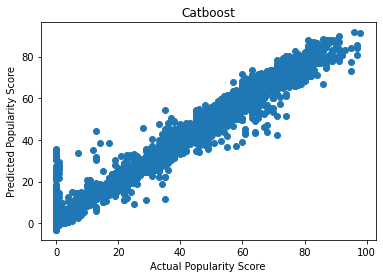

In [ ]:
plt.scatter(y_test, pred_cb)
plt.title('Catboost')
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.show()

In [ ]:
# use customized search grid
from sklearn.model_selection import GridSearchCV

parameters = {'depth'         : [16,20,30]
 #                 'learning_rate' : [0.01, 0.05, 0.1],
 #                 'iterations'    : [200, 300, 400]
                 }
# model.grid_search(parameters, train_dataset)
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.5204301600812092

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 400, 'learning_rate': 0.1}


In [ ]:
import numpy as np

pred_cb = grid.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred_cb)))
r2 = r2_score(y_test, pred_cb)

print("Catboost - Testing performance")
print("RMSE: {:.6f}".format(rmse))
print("R2: {:.6f}".format(r2))

Catboost - Testing performance
RMSE: 11.735827
R2: 0.540895


In [ ]:
# Inference-wise, CatBoost also offers the possibility to extract Variable Importance Plots
sorted_feature_importance = model.feature_importances_.argsort()
top_sorted_feature_importance = sorted_feature_importance # [26:41]

Text(0.5, 0, 'CatBoost Feature Importance')

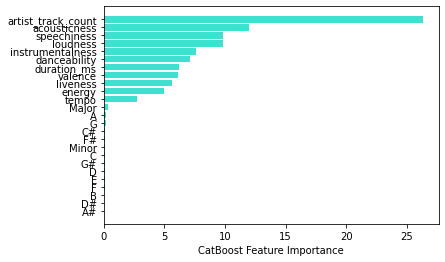

In [ ]:
import matplotlib.pyplot as plt
plt.barh(X_train.columns[top_sorted_feature_importance], 
        model.feature_importances_[top_sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

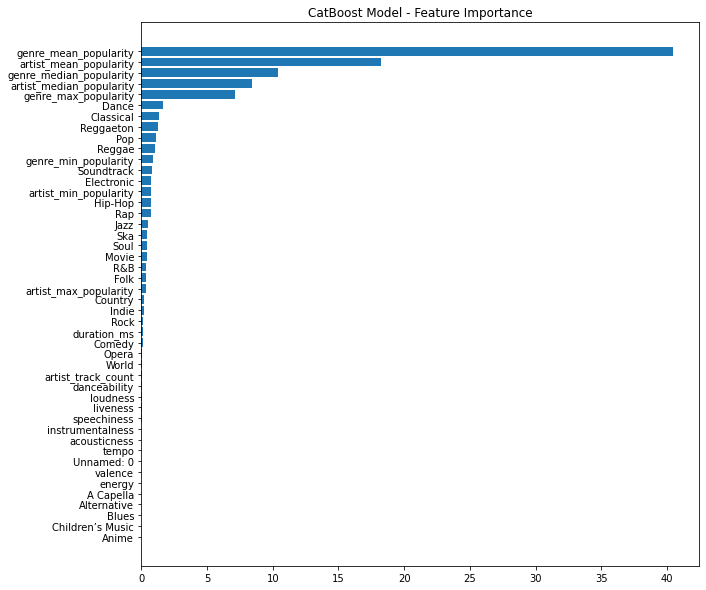

In [ ]:
# Visualize with matplotlib chart

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

fig, ax = plt.subplots()

y_pos = np.arange(len(model.feature_importances_[top_sorted_feature_importance]))

ax.barh(y_pos, model.feature_importances_[top_sorted_feature_importance], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(X_train.columns[top_sorted_feature_importance])

# ax.set_xlabel('Correlation with Song Popularity')
ax.set_title('CatBoost Model - Feature Importance')

plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Interpreting the result - SHAP Plot

In [ ]:
pip install shap

     |████████████████████████████████| 371 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509241 sha256=e8d0eee58e6b83ac3b8d61639bea0d389e614be82a8317c84c79b18a625d7e8b
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
from catboost import *
import shap
shap.initjs()

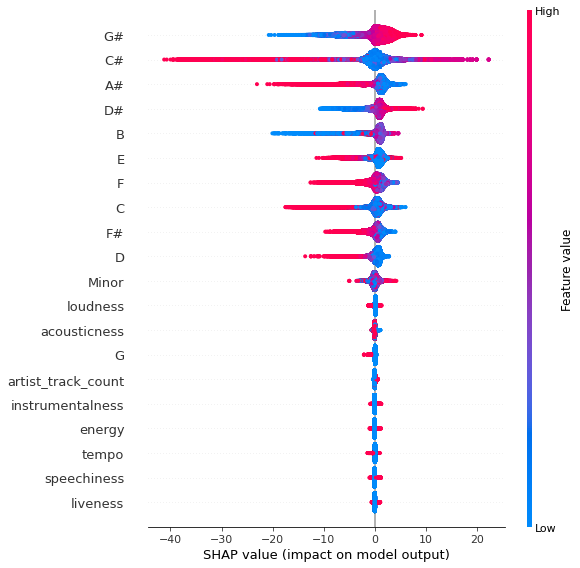

In [ ]:
# https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names = X_train.columns[sorted_feature_importance])